**The aim of this project is to study the titanic dataset through a Supervised learning machine classification algorithms**

*   **Pclass** : Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
*   **survival** : Survival (0 = No; 1 = Yes)
*   **name** : Name
*   **sex** : Sex
*   **age** : Age
*   **sibsp** : Number of Siblings/Spouses Aboard
*   **parch** : Number of Parents/Children Aboard
*   **ticket** : Ticket Number
*   **fare** : Passenger Fare (British pound)
*   **cabin** : Cabin
*   **Embarked** : Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd/content/drive/My Drive/Python Collabs/Supervised Learning Classification Checkpoint

/content/drive/My Drive/Python Collabs/Supervised Learning Classification Checkpoint


**Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats as st
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

**Load Data**

In [ ]:
df=pd.read_csv("titanic-passengers.csv",sep=';')

**Showing the head of dataframe**

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


**Showing the dataframe infos**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [ ]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Finding the missing values**

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Text(0.5, 1.0, 'Missing Values in Titanic dataset')

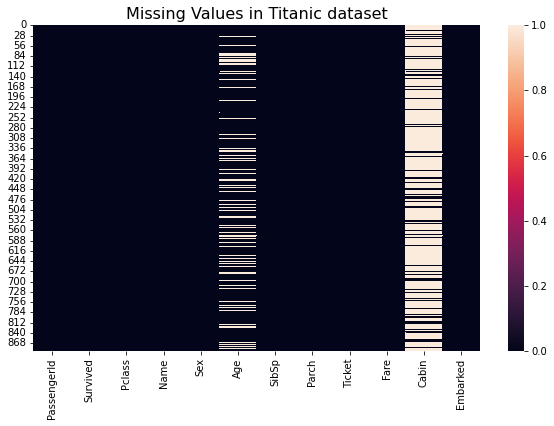

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull())
plt.title('Missing Values in Titanic dataset', size=16)

**Data replacing**



In [ ]:
df3=df.copy()
df3

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S


In [ ]:
df.groupby('Sex').agg(['mean','median'])['Age']

,mean,median
Sex,,
female,27.915709,27.0
male,30.726645,29.0


In [ ]:
tab_age=df.groupby('Sex').agg(['mean','median'])['Age']

This part is for replacing Age null values , the 'Cabin' by Uknown
'Embarked' by the mode

In [ ]:
for i in range(0,len(df3['Age'])):
  if df3['Sex'][i]=="male" and df3['Age'].isnull()[i]:
     df3['Age'][i]=tab_age.loc["male","mean"].round(1)
  elif df3['Sex'][i]=="female" and df3['Age'].isnull()[i]:
     df3['Age'][i]=tab_age.loc["female","mean"].round(1)
  else:
    x=1

for i in range(0,len(df3['Cabin'])):
  if type(df3['Cabin'][i])==float:
     df3['Cabin'][i]="Uknown"

for i in range(0,len(df3['Embarked'])):
  if type (df3['Embarked'][i])!='str':
     df3['Embarked'][i]=df3['Embarked'].mode()[0]
df3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,Uknown,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,Uknown,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,Uknown,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,Uknown,S
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,Uknown,S
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,Uknown,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,30.7,0,0,349215,7.8958,Uknown,S


In [ ]:
df3.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [ ]:
df3.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

dropping these features wich have no impact in model output

In [ ]:
df3

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,No,2,male,28.0,0,0,13.0000,Uknown,S
1,No,3,male,25.0,0,0,7.6500,F G73,S
2,No,3,male,20.0,0,0,7.8542,Uknown,S
3,No,3,female,29.0,0,4,21.0750,Uknown,S
4,No,1,male,31.0,1,0,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...
886,Yes,2,female,14.0,1,0,30.0708,Uknown,S
887,No,3,male,22.0,0,0,7.2292,Uknown,S
888,No,3,female,30.0,0,0,8.6625,Uknown,S
889,No,3,male,30.7,0,0,7.8958,Uknown,S


Dropping the features 'PassengerId','Name','Ticket'

**Data Transforming**

In [ ]:
dict_Survived={'Survived':{'No':0, 'Yes':1}}
df3.replace(dict_Survived,inplace=True)

dict_Sex={'Sex':{'male':0, 'female':1}}
df3.replace(dict_Sex,inplace=True)

dict_Embarked={'Embarked':{'C':0, 'Q':1,'S':2}}
df3.replace(dict_Embarked,inplace=True)
df3

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,2,0,28.0,0,0,13.0000,Uknown,2
1,0,3,0,25.0,0,0,7.6500,F G73,2
2,0,3,0,20.0,0,0,7.8542,Uknown,2
3,0,3,1,29.0,0,4,21.0750,Uknown,2
4,0,1,0,31.0,1,0,52.0000,B71,2
...,...,...,...,...,...,...,...,...,...
886,1,2,1,14.0,1,0,30.0708,Uknown,2
887,0,3,0,22.0,0,0,7.2292,Uknown,2
888,0,3,1,30.0,0,0,8.6625,Uknown,2
889,0,3,0,30.7,0,0,7.8958,Uknown,2


In [ ]:
df4=df3.copy()
for i in range(0,len(df3['Cabin'])):
  if df4['Cabin'][i]=='Uknown':
     df4['Cabin'][i]='U'
     
  else:
     df4['Cabin'][i]=df4['Cabin'][i][0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


replacing Uknown cabin by 'U' to apply LabelEncoder 

In [ ]:
df4['Cabin'].unique()

array(['U', 'F', 'B', 'C', 'A', 'E', 'D', 'T', 'G'], dtype=object)

In [ ]:
dict_Cabin={'Cabin':{'A':0, 'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'T':7,'U':8}}
df4.replace(dict_Cabin,inplace=True)
df4.rename(columns = {'Survived':'Survived_Yes', 'Sex':'Female'}, inplace = True)

In [ ]:
b=df4.columns.values.tolist()
feat_dict = {x: b[x] for x in range(len(b))}
feat_dict

{0: 'Survived_Yes',
 1: 'Pclass',
 2: 'Female',
 3: 'Age',
 4: 'SibSp',
 5: 'Parch',
 6: 'Fare',
 7: 'Cabin',
 8: 'Embarked'}

In [ ]:
feat_num={
 1: 'Pclass',
 3: 'Age',
 4: 'SibSp',
 5: 'Parch',
 6: 'Fare',
 7: 'Cabin',
 8: 'Embarked'}

In [ ]:
df4

,Survived_Yes,Pclass,Female,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,2,0,28.0,0,0,13.0000,8,2
1,0,3,0,25.0,0,0,7.6500,5,2
2,0,3,0,20.0,0,0,7.8542,8,2
3,0,3,1,29.0,0,4,21.0750,8,2
4,0,1,0,31.0,1,0,52.0000,1,2
...,...,...,...,...,...,...,...,...,...
886,1,2,1,14.0,1,0,30.0708,8,2
887,0,3,0,22.0,0,0,7.2292,8,2
888,0,3,1,30.0,0,0,8.6625,8,2
889,0,3,0,30.7,0,0,7.8958,8,2


In [ ]:
list_feat=['Pclass','Age','SibSp','Parch','Fare','Cabin','Embarked']

In [ ]:
from sklearn.preprocessing import StandardScaler
# extracting out the features
x = df4.loc[:, list_feat].values
# Standardizing the features
x_standardized = StandardScaler().fit_transform(x)
x_standardized

array([[-0.36936484, -0.13310777, -0.4745452 , ..., -0.38667072,
         0.52206745,  0.        ],
       [ 0.82737724, -0.36374494, -0.4745452 , ..., -0.4943913 ,
        -0.69776322,  0.        ],
       [ 0.82737724, -0.74814024, -0.4745452 , ..., -0.49027979,
         0.52206745,  0.        ],
       ...,
       [ 0.82737724,  0.02065035, -0.4745452 , ..., -0.47400493,
         0.52206745,  0.        ],
       [ 0.82737724,  0.0744657 , -0.4745452 , ..., -0.48944219,
         0.52206745,  0.        ],
       [-0.36936484, -0.8250193 , -0.4745452 , ..., -0.12491979,
         0.52206745,  0.        ]])

The part below is for declaring empty array and fill it with with the target values 'Survived_Yes'
and 'Female' which are 0,1 values then the list_feat wich are continues or out
of standard range [-1,1]

In [ ]:
empty_df=np.empty(shape=(891,9))

In [ ]:
empty_df[:,0]=df4.loc[:, 'Survived_Yes'].values 
empty_df[:,2]=df4.loc[:, 'Female'].values 

In [ ]:
po_num=list(feat_num.keys())
j=0                                                         
for i in po_num:
    empty_df[:,i]=x_standardized[:,j]                       # placing numeric standarsized features first in the empty array (empty_df)
    j=j+1      

In [ ]:
df5=pd.DataFrame(empty_df,columns=['Survived_Yes','Pclass','Female','Age','SibSp','Parch','Fare','Cabin','Embarked'])

In [ ]:
df5

,Survived_Yes,Pclass,Female,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0.0,-0.369365,0.0,-0.133108,-0.474545,-0.473674,-0.386671,0.522067,0.0
1,0.0,0.827377,0.0,-0.363745,-0.474545,-0.473674,-0.494391,-0.697763,0.0
2,0.0,0.827377,0.0,-0.748140,-0.474545,-0.473674,-0.490280,0.522067,0.0
3,0.0,0.827377,1.0,-0.056229,-0.474545,4.491540,-0.224083,0.522067,0.0
4,0.0,-1.566107,0.0,0.097529,0.432793,-0.473674,0.398582,-2.324204,0.0
...,...,...,...,...,...,...,...,...,...
886,1.0,-0.369365,1.0,-1.209415,0.432793,-0.473674,-0.042956,0.522067,0.0
887,0.0,0.827377,0.0,-0.594382,-0.474545,-0.473674,-0.502864,0.522067,0.0
888,0.0,0.827377,1.0,0.020650,-0.474545,-0.473674,-0.474005,0.522067,0.0
889,0.0,0.827377,0.0,0.074466,-0.474545,-0.473674,-0.489442,0.522067,0.0


Reconstruction of the DataFrame 

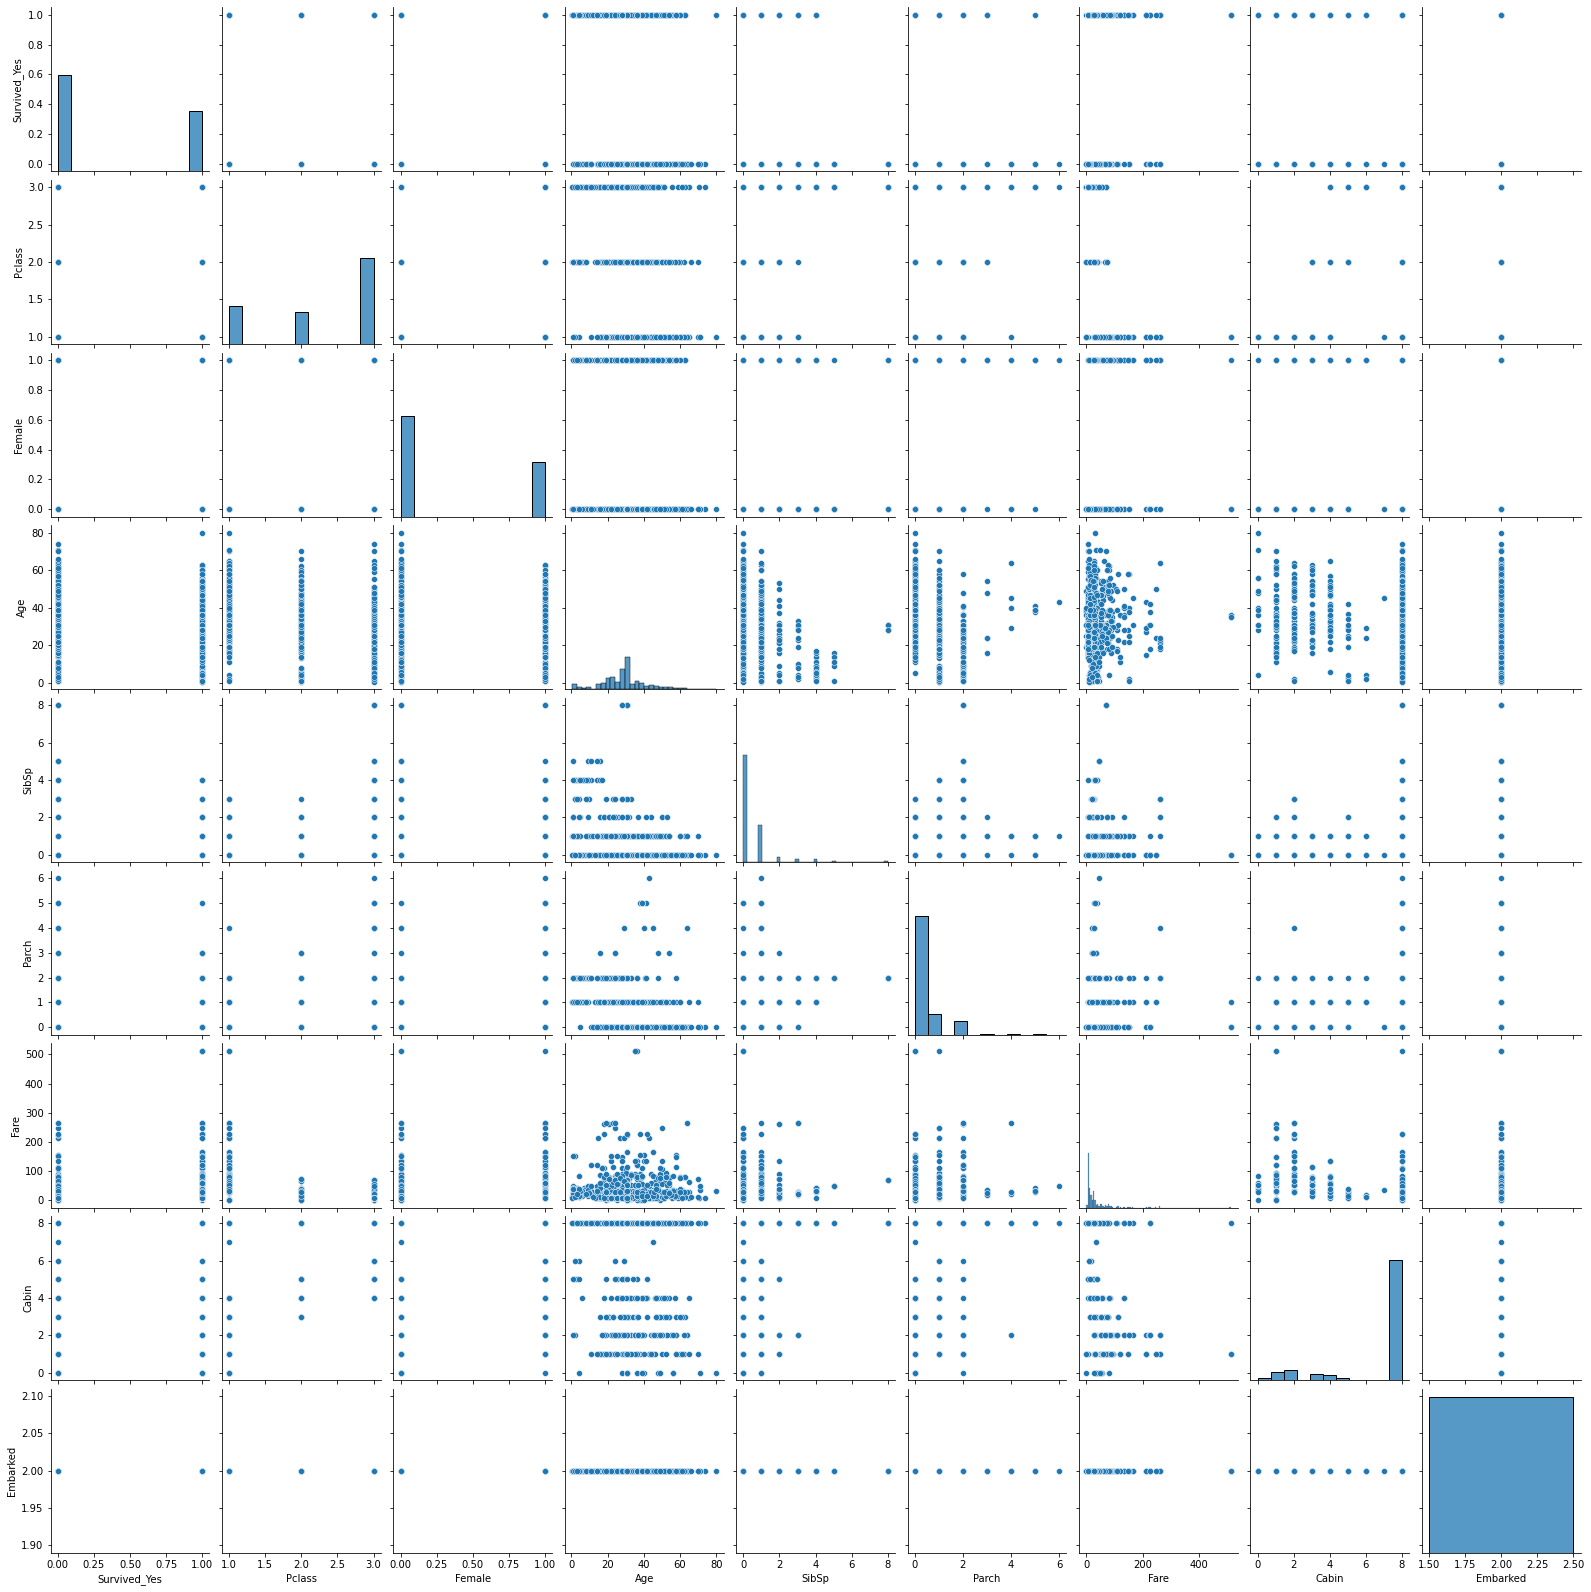

In [ ]:
sns.pairplot(df4)



```
# Ce texte est au format code
```

**Logistic Regression Model**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
#features extraction
x = df5[['Pclass', 'Female','Age','SibSp','Parch','Fare','Cabin','Embarked']]
y = df5['Survived_Yes']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=20)  
#splitting data with test size of 25%
logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred_log  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.83


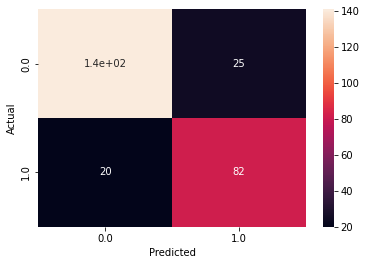

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred_log, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

Plotting confusing matrix shows that the most values are predicted false and are realy false (TN) explained by the fact that the most passengers didn't survive

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

         0.0       0.88      0.85      0.86       166
         1.0       0.77      0.80      0.78       102

    accuracy                           0.83       268
   macro avg       0.82      0.83      0.82       268
weighted avg       0.83      0.83      0.83       268



**ROC-AUC Classification**

ROC-AUC Curve is a measurement of classification algorithms performances
*   The ROC curve is plotted with TPR against the FPR where TPR is on the y-axis and FPR is on the x-axis.
* The best possible predict is made in the position [0,1] representing 100% sensitivity (no false prediction) and it is called
perfect classification where point [1,0] is the opposite (100% false predictions)
* The diagonal divides the curve into two parts : Points above the diagonal (better than random) and points under the diagonal (worse than random)
* The curve is also called sensitivity / 1-specificity graph : TPR/1-TNR 


In [ ]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
y_score2 = logreg.predict_proba(x_test)[:,1]

In [ ]:
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2)

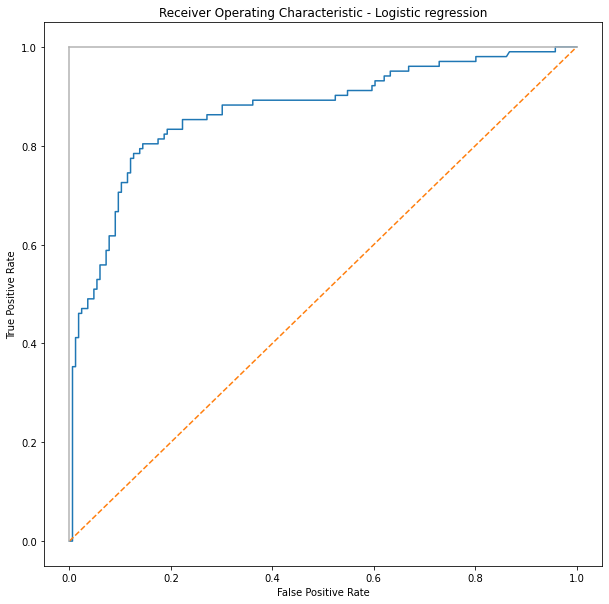

In [ ]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Logistic regression')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, y_score2))

roc_auc_score for Logistic Regression:  0.8712201748169146


**KNN Model**

In [ ]:
#import the relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn=KNeighborsClassifier(n_neighbors=20) #build our knn classifier
knn.fit(x_train,y_train) #Training KNN classifier
y_pred_knn=knn.predict(x_test)  #Testing
print('Acuuracy=',accuracy_score(y_pred_knn,y_test))

Acuuracy= 0.7910447761194029


In [ ]:
n_neighbors=30
scores=[]
for k in range(1,30):
    knn=KNeighborsClassifier(n_neighbors-k)
    knn.fit(x_train,y_train)
    y1_pred=knn.predict(x_test)
    print('Accuracy for k=',k,'is:',round(accuracy_score(y1_pred,y_test),2))
    scores.append(round(accuracy_score(y1_pred,y_test),2))

Accuracy for k= 1 is: 0.79
Accuracy for k= 2 is: 0.79
Accuracy for k= 3 is: 0.79
Accuracy for k= 4 is: 0.79
Accuracy for k= 5 is: 0.8
Accuracy for k= 6 is: 0.79
Accuracy for k= 7 is: 0.8
Accuracy for k= 8 is: 0.79
Accuracy for k= 9 is: 0.8
Accuracy for k= 10 is: 0.79
Accuracy for k= 11 is: 0.78
Accuracy for k= 12 is: 0.78
Accuracy for k= 13 is: 0.8
Accuracy for k= 14 is: 0.78
Accuracy for k= 15 is: 0.81
Accuracy for k= 16 is: 0.8
Accuracy for k= 17 is: 0.81
Accuracy for k= 18 is: 0.81
Accuracy for k= 19 is: 0.81
Accuracy for k= 20 is: 0.8
Accuracy for k= 21 is: 0.81
Accuracy for k= 22 is: 0.8
Accuracy for k= 23 is: 0.79
Accuracy for k= 24 is: 0.8
Accuracy for k= 25 is: 0.8
Accuracy for k= 26 is: 0.79
Accuracy for k= 27 is: 0.79
Accuracy for k= 28 is: 0.78
Accuracy for k= 29 is: 0.73


Text(0, 0.5, 'Testing Accuracy')

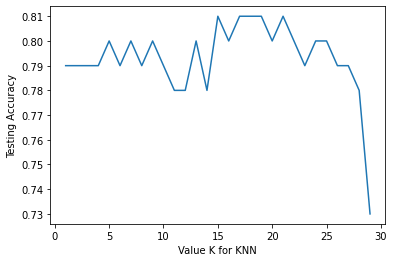

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1,30),scores)
plt.xlabel('Value K for KNN')
plt.ylabel('Testing Accuracy')

In [ ]:
#import the relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn_op=KNeighborsClassifier(n_neighbors=15) #build our knn classifier
knn_op.fit(x_train,y_train) #Training KNN classifier
y_pred_knn_op=knn_op.predict(x_test)  #Testing
print('Acuuracy=',accuracy_score(y_pred_knn_op,y_test))

Acuuracy= 0.8097014925373134


choosing the ideal K parameter led to **k=13 neighboors**

**Decision tree and random forest**

In [ ]:
#importing relevant libraries
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
#features extraction
#x=df4[['Pclass', 'Female','Age','SibSp','Parch','Fare','Cabin','Embarked']]
#y= df4["Survived_Yes"]
#splitting data
#x2_train, x2_test, y2_train, y2_test = train_test_split(x,y, test_size=0.25,random_state=20)
#applying tree algorithm
model = tree.DecisionTreeClassifier()  
model.fit(x_train, y_train)   #fitting our model
y_pred_DT=model.predict(x_test)   # evaluating our model
print("The score for this model is:{}".format(accuracy_score(y_pred_DT,y_test)))

The score for this model is:0.7574626865671642


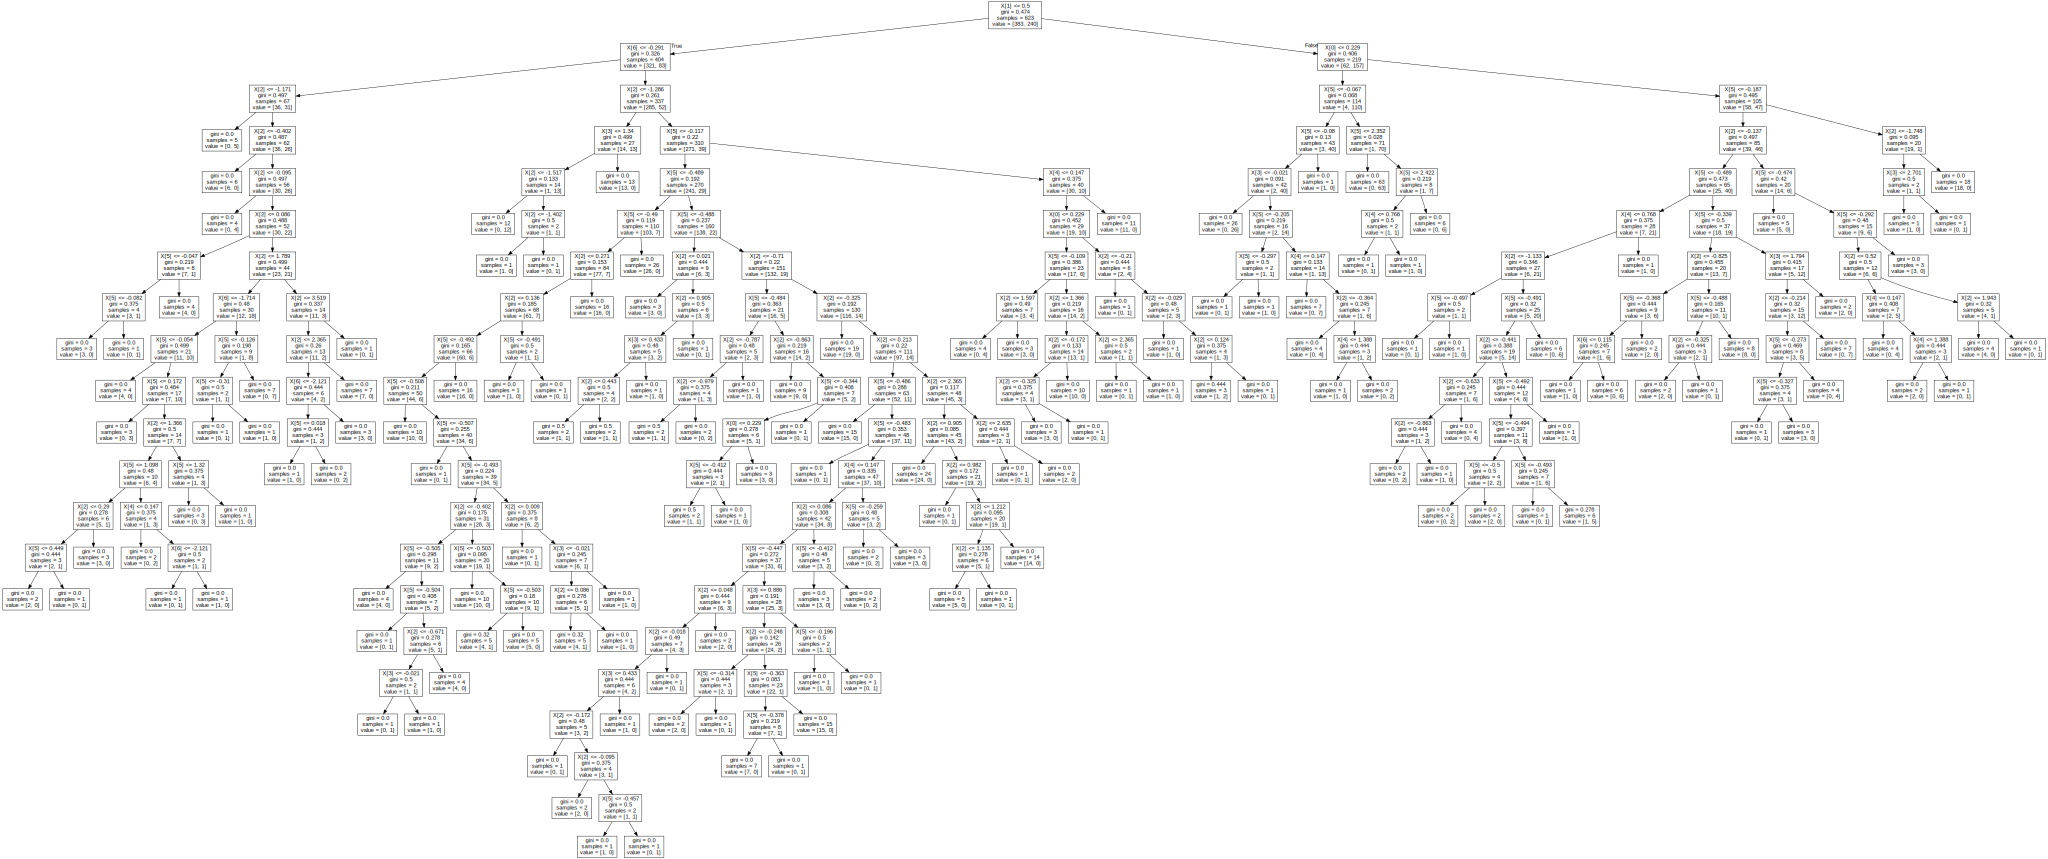

In [ ]:
import graphviz
from sklearn.tree import export_graphviz
dot_data=tree.export_graphviz(model, out_file=None)
graph=graphviz.Source(dot_data)
graph.render('df5')
graph

In [ ]:
model1=tree.DecisionTreeClassifier(criterion='gini',max_depth=3,max_leaf_nodes=10)
model1.fit(x_train,y_train)
y_pred=model1.predict(x_test)
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.8470149253731343


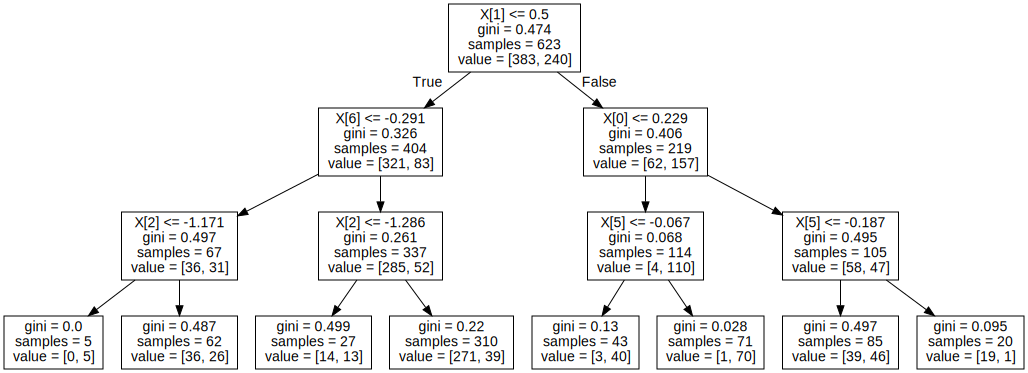

In [ ]:
dot_data=tree.export_graphviz(model1, out_file=None)
graph=graphviz.Source(dot_data)
graph.render('df5')
graph

After changing the parameters we notice an improvement of the precision of the model precision

**Random Forest Model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier #Importing Random Forest Classifier
from sklearn import metrics  # Importing metrics to test accuracy

In [ ]:
clf=RandomForestClassifier(n_estimators=10,bootstrap=True)  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred_rf=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_pred_rf,y_test))  #Measuring the accuracy of our model

Accuracy: 0.8059701492537313


In [ ]:
clf=RandomForestClassifier(n_estimators=200,bootstrap=True,max_samples=200)  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred_rf=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_pred_rf,y_test))  #Measuring the accuracy of our model

Accuracy: 0.8395522388059702


Using this model gave more accuracy than the simple decision tree model

In [ ]:
y_score1 = logreg.predict_proba(x_test)[:,1]
y_score2 = knn.predict_proba(x_test)[:,1]
y_score3 = model.predict_proba(x_test)[:,1]
y_score4 = clf.predict_proba(x_test)[:,1]

false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
false_positive_rate2, true_positive_rate2, threshold1 = roc_curve(y_test, y_score2)
false_positive_rate3, true_positive_rate3, threshold1 = roc_curve(y_test, y_score3)
false_positive_rate4, true_positive_rate4, threshold1 = roc_curve(y_test, y_score4)

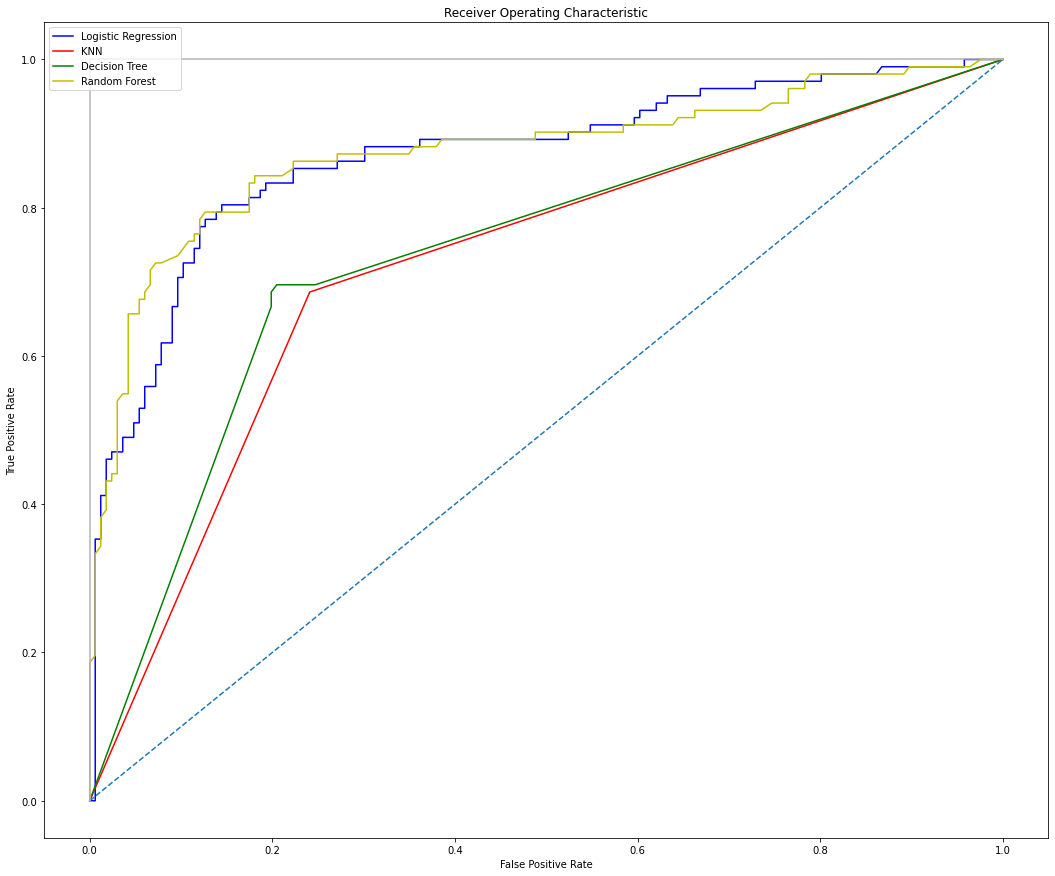

In [ ]:
plt.subplots(1, figsize=(18,15))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate1, true_positive_rate1,color='b',label='Logistic Regression')
plt.plot(false_positive_rate2, true_positive_rate2,color='r',label='KNN')
plt.plot(false_positive_rate3, true_positive_rate3,color='g',label='Decision Tree')
plt.plot(false_positive_rate4, true_positive_rate4,color='y',label='Random Forest')
plt.legend(loc="upper left")
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

* logistic regression : 0.83 
* knn Decision : 0.79
* tree  : 0.75-0.84
* random forest: 0.79-0.85

The random forest and logistic regression models are the best predictors because they occupy the biggest area under the random curve (p=0.5) but also the decision tree optimized parameters is a good model (0.84)

* With optimazation of model parameters the tree decision an random forest are very good predictors and the results are close .

The choosing of model in general case depends of what we expect from it
either the specificity or the sensitivity

**Conclusion**
* The retained model is optimized **random forest**